<a href="https://colab.research.google.com/github/debanjan02/BreakHis/blob/master/K_means/magnification_100x/BreakHis_100_K_means_k4_octal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from sklearn.cluster import KMeans, estimate_bandwidth, MeanShift
from glob import glob
import cv2
import fnmatch

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x = np.load('/content/drive/My Drive/project/x_BreakHis_100_K_mean_K4.npy')
y = np.load('/content/drive/My Drive/project/y_BreakHis_100_octal.npy')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101)
y_train = to_categorical(y_train, num_classes = 8)
y_valid = to_categorical(y_valid, num_classes = 8)

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
input_tensor = Input(shape=(299,299,3))
base_model = InceptionV3(input_tensor = input_tensor, include_top = False, pooling = 'average')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(8, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

87916544/87910968 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________

In [0]:
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/project/model_check_path_BreakHis_100_k_means_octal_inception_v3',monitor="val_acc", save_best_only=True, save_weights_only=False)
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 150, verbose=1,  validation_data=(x_valid, y_valid), callbacks=[mcp])

Train on 4994 samples, validate on 1249 samples
Epoch 1/150
4994/4994 [==============================] - 220s 44ms/step - loss: 1.3079 - acc: 0.5557 - val_loss: 4.3983 - val_acc: 0.1705
Epoch 2/150
4994/4994 [==============================] - 196s 39ms/step - loss: 0.8306 - acc: 0.7050 - val_loss: 8.9143 - val_acc: 0.1137
Epoch 3/150
4994/4994 [==============================] - 196s 39ms/step - loss: 0.5814 - acc: 0.7942 - val_loss: 1.1249 - val_acc: 0.6789
Epoch 4/150
4994/4994 [==============================] - 196s 39ms/step - loss: 0.4698 - acc: 0.8364 - val_loss: 1.8646 - val_acc: 0.6077
Epoch 5/150
4994/4994 [==============================] - 196s 39ms/step - loss: 0.3550 - acc: 0.8779 - val_loss: 2.1956 - val_acc: 0.5164
Epoch 6/150
4994/4994 [==============================] - 196s 39ms/step - loss: 0.3132 - acc: 0.8853 - val_loss: 1.0649 - val_acc: 0.7190
Epoch 7/150
4994/4994 [==============================] - 196s 39ms/step - loss: 0.3064 - acc: 0.8913 - val_loss: 1.9473 - va

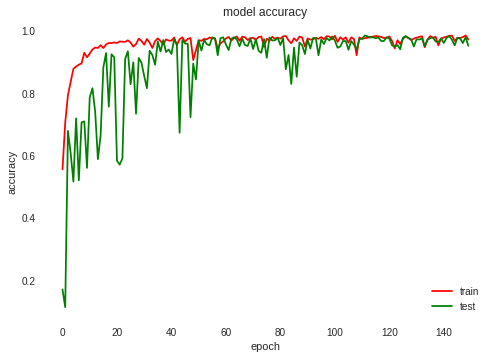

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

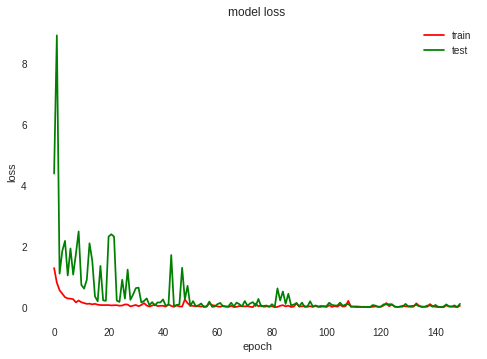

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
model.load_weights('/content/drive/My Drive/project/model_check_path_BreakHis_100_k_means_octal_inception_v3')

In [0]:
from sklearn.metrics import classification_report
pred = model.predict(x_valid)
print(classification_report(np.argmax(y_valid, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00        83
           3       1.00      1.00      1.00       111
           4       0.97      1.00      0.98       536
           5       0.98      0.85      0.91       106
           6       1.00      0.98      0.99       117
           7       1.00      1.00      1.00        84

   micro avg       0.98      0.98      0.98      1249
   macro avg       0.99      0.98      0.98      1249
weighted avg       0.98      0.98      0.98      1249



In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.grid(b=False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

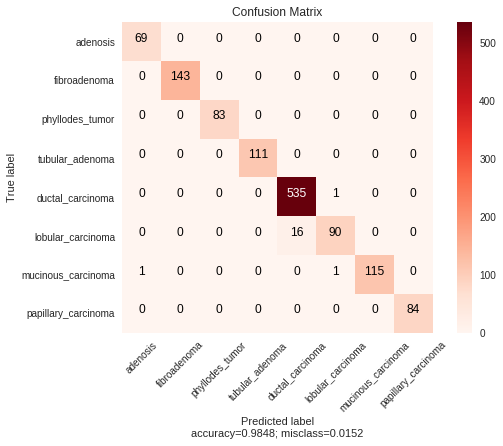

In [0]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_valid, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap ='Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

In [0]:
from vis.visualization import visualize_activation,visualize_saliency,overlay,visualize_cam
from vis.utils import utils
from keras import activations
layer_idx = utils.find_layer_idx(model, 'dense_2')
print("Remove Activation from Last Layer")
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
print("Done. Now Applying changes to the model ...")
model = utils.apply_modifications(model)

Remove Activation from Last Layer
Done. Now Applying changes to the model ...


In [0]:
layer_idx = utils.find_layer_idx(model, 'dense_2')
heatmap = visualize_cam(model, layer_idx, filter_indices=248, seed_input=x_valid[0])
plt.imshow(heatmap)
plt.show()
png

ValueError: ignored